<a href="https://colab.research.google.com/github/Tamano-git/techgym_python/blob/master/6_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

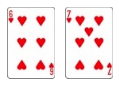

In [7]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

card_images = []

def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13
  
  if not os.path.isfile(image_name):
    response = requests.get('http://3156.bz/techgym/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)
   
  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]
  
  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

def play():
  load_image()
  show_test()

def show_test():
  plt.subplot(1,6,1)
  plt.axis("off")
  plt.imshow(card_images[5])
  plt.subplot(1,6,2)
  plt.axis("off")
  plt.imshow(card_images[6])
  plt.show()

play()